# This script is designed to graph speed profiles before approaching the beacon.

#### It should take beacons file, find time, match with position, then read however rows of position before and after and plot it. 

##### imports 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
from matplotlib.patches import Circle
import matplotlib.tri as tri
import numpy as np
from scipy.spatial.transform import Rotation as R

root = 'C:/Users/Fabian/Desktop/Analysis/Multiple_trial_analysis/Data/Raw/'
figures = 'C:/Users/Fabian/Desktop/Analysis/Multiple_trial_analysis/Figures/'

#Data with beacon metadata
beacon = pd.read_csv(root+'beacons 20200128-151826.txt',sep=" ", header=None)
beacon2 = pd.read_csv(root+'beacons 20200128-160013.txt',sep=" ", header=None)

beacon_Day86_fs2 = pd.read_csv(root+'beacons 20200128-151826.txt',sep=" ", header=None)
beacon_Day86_fs1 = pd.read_csv(root+'beacons 20200128-160013.txt',sep=" ", header=None)

beacon_Day87_fs2 = pd.read_csv(root+'beacons 20200129-153534.txt',sep=" ", header=None)
beacon_Day87_fs1 = pd.read_csv(root+'beacons 20200129-161806.txt',sep=" ", header=None)

beacon_Day88_fs2 = pd.read_csv(root+'beacons 20200130-102126.txt',sep=" ", header=None)
beacon_Day88_fs1 = pd.read_csv(root+'beacons 20200130-111741.txt',sep=" ", header=None)

beacon_Day89_fs2 = pd.read_csv(root+'beacons 20200130-161126.txt',sep=" ", header=None)
beacon_Day89_fs1 = pd.read_csv(root+'beacons 20200130-151829.txt',sep=" ", header=None)

beacon_Day90_fs2 = pd.read_csv(root+'beacons 20200203-154441.txt',sep=" ", header=None)
beacon_Day90_fs1 = pd.read_csv(root+'beacons 20200203-145842.txt',sep=" ", header=None)

beacon_Day91_fs2 = pd.read_csv(root+'beacons 20200204-125552.txt',sep=" ", header=None)
beacon_Day91_fs1 = pd.read_csv(root+'beacons 20200204-133905.txt',sep=" ", header=None)

beacon_Day92_fs2 = pd.read_csv(root+'beacons 20200205-143220.txt',sep=" ", header=None)
beacon_Day92_fs1 = pd.read_csv(root+'beacons 20200205-151052.txt',sep=" ", header=None)

beacon_Day93_fs2 = pd.read_csv(root+'beacons 20200206-133529.txt',sep=" ", header=None)
beacon_Day93_fs1 = pd.read_csv(root+'beacons 20200206-125706.txt',sep=" ", header=None)

Day46_fs1 = pd.read_csv(root+'position 20190923-174441.txt',sep=" ", header=None)
Day46_fs2 = pd.read_csv(root+'position 20190923-171112.txt',sep=" ", header=None)
Day47_fs1 = pd.read_csv(root+'position 20191001-112411.txt',sep=" ", header=None)
Day47_fs2 = pd.read_csv(root+'position 20191001-115127.txt',sep=" ", header=None)
Day48_fs1 = pd.read_csv(root+'position 20191002-115000.txt',sep=" ", header=None)
Day48_fs2 = pd.read_csv(root+'position 20191002-111038.txt',sep=" ", header=None)
Day51_fs1 = pd.read_csv(root+'position 20191106-170809.txt',sep=" ", header=None)
Day52_fs2 = pd.read_csv(root+'position 20191107-174215.txt',sep=" ", header=None)
Day52_fs1 = pd.read_csv(root+'position 20191107-183857.txt',sep=" ", header=None)
Day53_fs2 = pd.read_csv(root+'position 20191108-142321.txt',sep=" ", header=None)
Day53_fs1 = pd.read_csv(root+'position 20191108-145125.txt',sep=" ", header=None)
Day66_fs1 = pd.read_csv(root+'position 20191118-161325.txt',sep=" ", header=None)
Day66_fs2 = pd.read_csv(root+'position 20191118-171209.txt',sep=" ", header=None)
Day72_fs1 = pd.read_csv(root+'position 20191127-122008.txt',sep=" ", header=None)
Day72_fs2 = pd.read_csv(root+'position 20191127-132223.txt',sep=" ", header=None)


Day79_fs2 = pd.read_csv(root+'position 20200121-154004.txt',sep=" ", header=None)
Day79_fs1 = pd.read_csv(root+'position 20200121-161359.txt',sep=" ", header=None)

Day80_fs2 = pd.read_csv(root+'position 20200122-141738.txt',sep=" ", header=None)
Day80_fs1 = pd.read_csv(root+'position 20200122-133022.txt',sep=" ", header=None)

Day81_fs2 = pd.read_csv(root+'position 20200123-141930.txt',sep=" ", header=None)
Day81_fs1 = pd.read_csv(root+'position 20200123-150059.txt',sep=" ", header=None)

Day82_fs2 = pd.read_csv(root+'position 20200124-151642.txt',sep=" ", header=None)
Day82_fs1 = pd.read_csv(root+'position 20200124-160826.txt',sep=" ", header=None)

Day83_fs2 = pd.read_csv(root+'position 20200126-183810.txt',sep=" ", header=None)
Day83_fs1 = pd.read_csv(root+'position 20200126-180200.txt',sep=" ", header=None)

Day84_fs2 = pd.read_csv(root+'position 20200127-205615.txt',sep=" ", header=None)
Day84_fs1 = pd.read_csv(root+'position 20200127-155645.txt',sep=" ", header=None)

Day85_fs2 = pd.read_csv(root+'position 20200128-112255.txt',sep=" ", header=None)
Day85_fs1 = pd.read_csv(root+'position 20200128-104637.txt',sep=" ", header=None)

Day86_fs2 = pd.read_csv(root+'position 20200128-160013.txt',sep=" ", header=None)
Day86_fs1 = pd.read_csv(root+'position 20200128-151826.txt',sep=" ", header=None)

Day87_fs2 = pd.read_csv(root+'position 20200129-153534.txt',sep=" ", header=None)
Day87_fs1 = pd.read_csv(root+'position 20200129-161806.txt',sep=" ", header=None)

Day88_fs2 = pd.read_csv(root+'position 20200130-102126.txt',sep=" ", header=None)
Day88_fs1 = pd.read_csv(root+'position 20200130-111741.txt',sep=" ", header=None)

Day89_fs2 = pd.read_csv(root+'position 20200130-161126.txt',sep=" ", header=None)
Day89_fs1 = pd.read_csv(root+'position 20200130-151829.txt',sep=" ", header=None)

Day90_fs2 = pd.read_csv(root+'position 20200203-154441.txt',sep=" ", header=None)
Day90_fs1 = pd.read_csv(root+'position 20200203-145842.txt',sep=" ", header=None)

Day91_fs2 = pd.read_csv(root+'position 20200204-125552.txt',sep=" ", header=None)
Day91_fs1 = pd.read_csv(root+'position 20200204-133905.txt',sep=" ", header=None)

Day92_fs2 = pd.read_csv(root+'position 20200205-143220.txt',sep=" ", header=None)
Day92_fs1 = pd.read_csv(root+'position 20200205-151052.txt',sep=" ", header=None)

Day93_fs2 = pd.read_csv(root+'position 20200206-133529.txt',sep=" ", header=None)
Day93_fs1 = pd.read_csv(root+'position 20200206-125706.txt',sep=" ", header=None)


## now need to add a function which takes time from beacon and matches it with position information in position 

In [2]:
beacon = pd.read_csv(root+'beacons 20200128-151826.txt',sep=" ", header=None)
Day86_fs1 = pd.read_csv(root+'position 20200128-151826.txt',sep=" ", header=None)


## Get speed list! 

In [3]:
def calculateSpeed_list(x,y,time): 
    travel=0
    speed=[] 
    for i in range(len(y)-1):
        dist = math.sqrt((x[0+i] - x[1+i])**2 + (y[0+i] - y[1+i])**2)/time
        speed.append(dist)   
    return (speed)




## Freguency 100hz

## focused on 10 seconds before beacon

# ploted focused on 0 as beacon stop - 10 sec in front and back 

## visible 

20 seconds in session 86, with 100 max speed filter showing 35 beacons gaussian filter of sigma= 10 all trials 


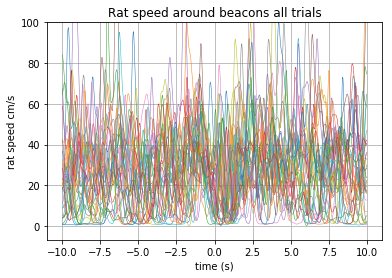

In [24]:
from scipy.ndimage.filters import gaussian_filter1d
import math

def Speed_before_beacon (session,seconds_back,position_data,beacon_data,max_speed,smoothening,visible=all,height=False): 
    """function plots a given amount of seconds before beacon reached, takes Beacon file, position file, ceiling on speed for filtering """
    
    # still 
    time_since_list =((np.array(beacon_data [0]))-(np.array(position_data[0]))[0])    
    enum = list(np.arange(0,len(list(time_since_list)),1))
    index=[]
    for i in enum:
        index.append(np.abs(beacon_data[0][i]-position_data[0]).values.argmin() )
        
    if height== False:
        num=3
    else:
        num=2
        
    
    time =  0.01
    speed_list = calculateSpeed_list(position_data[1],position_data[num],time)
    speed_list = [element * 100 for element in speed_list] # to get to cm/s speed. 
    time = np.arange(-seconds_back,seconds_back,.01)       

    fig, ax = plt.subplots()
    
    # involve gaussian smoothening. 
    if visible == True:
        index = index[::2]
        eye='visible trials'
    elif visible == False:
        index = index[1::2] 
        eye = 'invisible trials'
    else: 
        index=index
        eye = 'all trials'
            
    
    for i in index:        
        if i <= 500:
            i = 501
        else:
            ysmoothed = gaussian_filter1d(speed_list[i-(seconds_back*100):i+(seconds_back*100)], sigma=smoothening)
            ax.plot(time, ysmoothed,linewidth=.5)

    ax.set(xlabel='time (s)', ylabel='rat speed cm/s',
           title='Rat speed around beacons %s' %(eye))
    ax.grid()

    ax.set_ylim(top = max_speed)
    ax.set_alpha (alpha = .5)
    print('%s seconds in session %s, with %s max speed filter showing %s beacons gaussian filter of sigma= %s %s '% (seconds_back*2, session, max_speed,len(index),smoothening,eye))

    plt.savefig('%s_Rat_speed_%s_before_and _after_%s_beacon_%s.png'%(figures,seconds_back,session,eye), dpi = 1000)
    plt.show()
Speed_before_beacon ('86',10,Day86_fs1,beacon,100,10,visible=all,height=False) 

# invisible

20 seconds in session 86, with 100 max speed filter showing 17 beacons gaussian filter of sigma= 10 invisible trials 


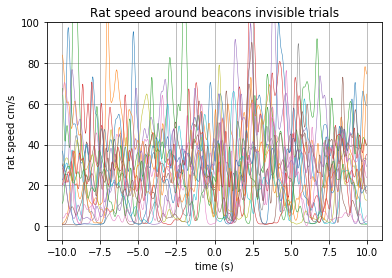

In [30]:
Speed_before_beacon ('86',10,Day86_fs1,beacon,100,10,visible=False,height=False) 

## visible height

20 seconds in session 86, with 100 max speed filter showing 18 beacons gaussian filter of sigma= 10 visible trials 


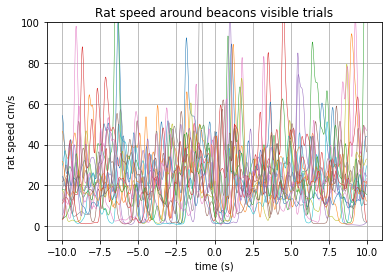

In [29]:
Speed_before_beacon ('86',10,Day86_fs1,beacon,100,10,visible=True,height=True) 

# invisible height

20 seconds in session 86, with 100 max speed filter showing 17 beacons gaussian filter of sigma= 10 invisible trials 


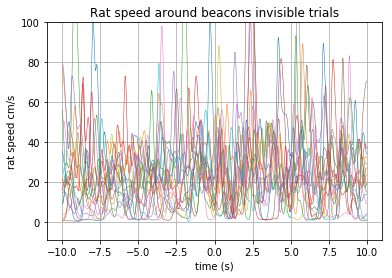

In [28]:
Speed_before_beacon ('86',10,Day86_fs1,beacon,100,10,visible=False,height=True) 

## Now looking at specific 2 seconds before and after with 2 speed max.. 

4 seconds in session 86, with 100 max speed filter showing 17 beacons gaussian filter of sigma= 10 invisible trials 


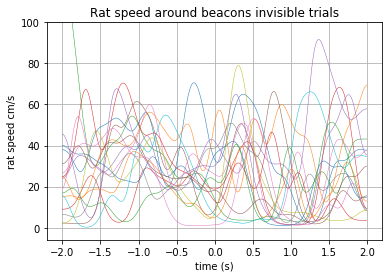

In [25]:
Speed_before_beacon ('86',2,Day86_fs1,beacon,100,10,visible=False,height=False) 

4 seconds in session 86, with 100 max speed filter showing 18 beacons gaussian filter of sigma= 10 visible trials 


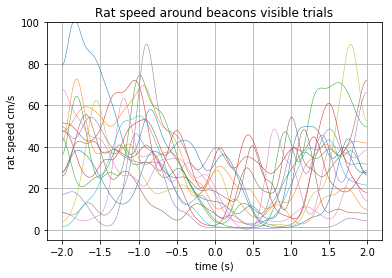

In [27]:
Speed_before_beacon ('86',2,Day86_fs1,beacon,100,10,visible=True,height=False)

## rat FS2

## Disclaimer - using a gaussiaun filter - maybe some other would be better. 